Sno              int64
Date    datetime64[ns]
USD            float64
EUR            float64
GBP            float64
INR            float64
AED            float64
CNY            float64
dtype: object


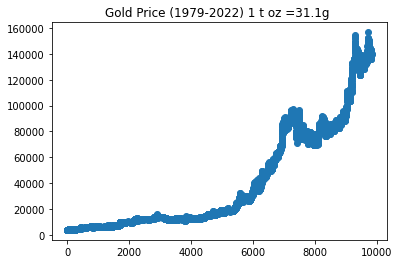

In [3]:
import numpy as np
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt

data=read_csv("../data/daily_gold_rate.csv")
data["Date"]=pd.to_datetime(data["Date"],dayfirst=True)
print(data.dtypes)
sno=data["Sno"].tolist()
dates=data["Date"].tolist()
inr=data["INR"].tolist()
x_train=np.array(sno).reshape(-1,1)
y_train=np.array(inr).reshape(-1,1)


plt.plot(x_train,y_train,"o")
plt.title("Gold Price (1979-2022) 1 t oz =31.1g ")
plt.show()

# print("Date",dates)
# print("inr prices",inr)


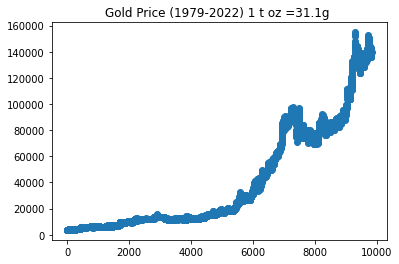

In [4]:
from sklearn.model_selection import train_test_split

train_data , test_data=train_test_split(data,test_size=0.2,random_state=25)
# print(train_data)
# print(test_data)

sno=train_data["Sno"].tolist()
dates=train_data["Date"].tolist()
inr=train_data["INR"].tolist()
x_train=np.array(sno).reshape(-1,1)
y_train=np.array(inr).reshape(-1,1)


sno1=test_data["Sno"].tolist()
dates1=test_data["Date"].tolist()
inr1=test_data["INR"].tolist()
x_test=np.array(sno1).reshape(-1,1)
y_test=np.array(inr1).reshape(-1,1)

plt.plot(x_train,y_train,"o")
plt.title("Gold Price (1979-2022) 1 t oz =31.1g ")
plt.show()

for test data 0.8046906635106958


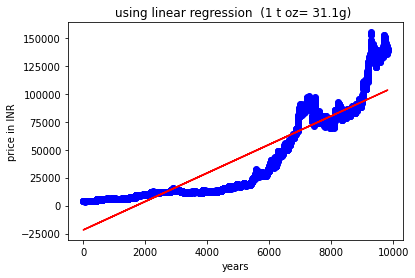

In [5]:
from turtle import color
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin=LinearRegression()
lin.fit(x_train,y_train)
y_pred=lin.predict(x_test)
print("for test data",r2_score(y_test,y_pred))

plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,lin.predict(x_train),color="red")
plt.title("using linear regression  (1 t oz= 31.1g) ")
plt.xlabel("years")
plt.ylabel("price in INR")
plt.show()

0.953066716687774


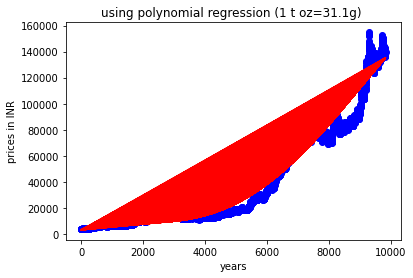

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x_train)
x_polytest=poly.transform(x_test)
poly.fit(x_poly,y_train)
lin2=LinearRegression()
lin2.fit(x_poly,y_train)
y_pred=lin2.predict(x_polytest)
print(r2_score(y_test,y_pred))



plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,lin2.predict(poly.fit_transform(x_train)),color="red")
plt.title("using polynomial regression (1 t oz=31.1g) ")
plt.xlabel("years")
plt.ylabel("prices in INR")
plt.show()